In [22]:
from common import Sort

In [23]:
class MedianSortOfFour(Sort):
    
    def __init__(self, A = []):
        super(MedianSortOfFour, self).__init__(A)
    
    def medianOfFour(self, left, gap):
        A = self.A
        a1, a2, a3, a4 = A[left], A[left + gap], A[left + gap * 2], A[left + gap * 3]
        
        if a1 <= a2:
            if a2 <= a3:
                if a2 <= a4:
                    if a3 > a4:
                        A[left + gap * 2], A[left + gap * 3] = A[left + gap * 3], A[left + gap * 2]
                else:
                    A[left + gap], A[left + gap * 2] = A[left + gap * 2], A[left + gap]
            else:
                if a1 <= a3:
                    if a3 <= a4:
                        if a2 <= a4:
                            A[left + gap], A[left + gap * 2] = A[left + gap * 2], A[left + gap]
                        else:
                            A[left + gap * 2], A[left + gap * 3] = A[left + gap * 3], A[left + gap * 2]
                else:
                    if a1 <= a4:
                        if a2 <= a4:
                            A[left + gap], A[left + gap * 2] = A[left + gap * 2], A[left + gap]
                        else:
                            A[left + gap * 2], A[left + gap * 3] = A[left + gap * 3], A[left + gap * 2]
                    else:
                        A[left], A[left + gap * 2] = A[left + gap * 2], A[left]
        else:
            if a1 <= a3:
                if a1 <= a4:
                    if a3 > a4:
                        A[left + gap * 2], A[left + gap * 3] = A[left + gap * 3], A[left + gap * 2]
            else:
                if a2 <= a3:
                    if a3 <= a4:
                        if a1 <= a4:
                            A[left + gap], A[left + gap * 2] = A[left + gap * 2], A[left + gap]
                        else:
                            A[left + gap * 2], A[left + gap * 3] = A[left + gap * 3], A[left + gap * 2]
                    if a2 <= a4:
                        if a1 <= a4:
                            A[left + gap], A[left + gap * 2] = A[left + gap * 2], A[left + gap]
                        else:
                            A[left + gap * 2], A[left + gap * 3] = A[left + gap * 3], A[left + gap * 2]
                    else:
                        A[left + gap], A[left + gap * 2] = A[left + gap * 2], A[left + gap]
                            
    def insertion(self, low, high, gap):
        A = self.A
        
        for loc in range(low + gap, high + 1, gap):
            i = loc - gap
            value = A[loc]
            
            while i >= low and A[i] > value:
                A[i + gap] = A[i]
                i -= gap
            
            A[i + gap] = value
        
    def medianOfMedians(self, left, right, gap):
        span = 4 * gap
        
        num = (right - left + 1) // span
        if num == 0:
            self.insertion(left, right, gap)
            num = (right - left + 1) // gap
            return left + gap * (num - 1) // 2
    
        for s in range(left, right - span, span):
            self.medianOfFour(s, gap)
        
        if num < 4:
            self.insertion(left + span // 2, right, span)
            return left + num * span // 2
        else:
            return self.medianOfMedians(left + span // 2, s - 1, span)
        
    def partition(self, lo, hi, pivotIndex):
        A = self.A
        pivot = A[pivotIndex]
        
        A[hi], A[pivotIndex] = A[pivotIndex], A[hi]
        
        store = lo
        for idx in range(lo, hi):
            if A[idx] < pivot:
                A[idx], A[store] = A[store], A[idx]
                store += 1
        
        A[hi], A[store] = A[store], A[hi]
        
        return store

    def selectMedian(self, left, right):
        k = (right - left + 1) // 2        
        while k > 0:
            idx = self.medianOfMedians(left, right, 1)
            pivotIndex = self.partition(left, right, idx)
            
            p = left + k
            
            if p == pivotIndex:
                return pivotIndex
            elif p < pivotIndex:
                right = pivotIndex - 1
            else:
                k = k - (pivotIndex - left + 1)
                left = pivotIndex + 1
        
        return left
    
    def medianSort(self, lo, hi):
        if hi <= lo:
            return
        
        mid = self.selectMedian(lo, hi)        
        self.medianSort(lo, lo + mid - 1)
        self.medianSort(lo + mid + 1, hi)
        
    def _sort(self):
        self.medianSort(self.start, self.end)        
        return self.A
    

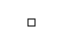

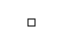

  verify = True





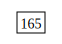

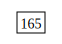

  verify = True





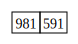

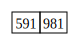

  verify = True





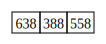

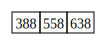

  verify = True





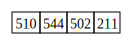

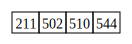

  verify = True





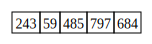

IndexError: list index out of range

In [24]:
MedianSortOfFour().verify()